# Code für Seaborn Tutorial

Nachvollziehen des Tutorials für Seaborn auf Youtube.

[Seaborn Tutorial : Seaborn Full Course](https://www.youtube.com/watch?v=6GUZXDef2U0)

### Setup

In [1]:
import numpy as np  # Numpy für numerische Berechnungen
import pandas as pd  # Pandas für Datenverarbeitung und -analyse
import matplotlib.pyplot as plt  # Matplotlib für Visualisierung
import seaborn as sns  # Seaborn für fortgeschrittene Datenvisualisierung


# Bewirkt, dass matplotlib-Diagramme direkt im Notebook gerendert werden.
%matplotlib inline

# Lädt das autoreload-Modul, das automatische Code-Neuladen ermöglicht.
%reload_ext autoreload

# Stellt sicher, dass alle Module automatisch neu geladen werden, wenn sie geändert werden.
%autoreload 2

### Import Data

In [ ]:
# print(sns.get_dataset_names()) # Namen der vorhandenen Seaborn Datasets

crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Blocks
Verteilungen von einer Variable.

/var/folders/p7/_dhlrgy92z5d1j7jd4rvn70r0000gn/T/ipykernel_36029/3098286094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crash_df['not_distracted'], bins=6)


<Axes: xlabel='not_distracted', ylabel='Density'>

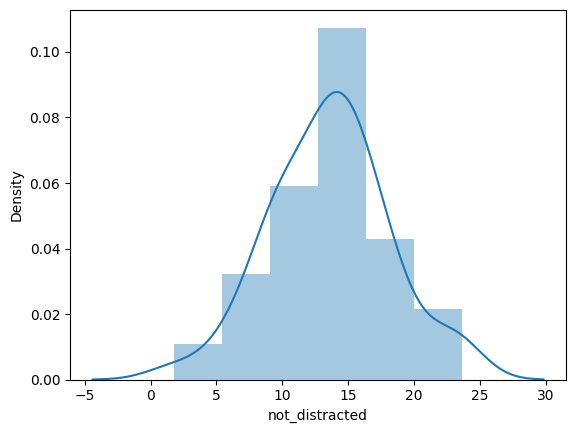

In [3]:
sns.distplot(crash_df['not_distracted'], bins=6)

### Joint Plots
Zwei Verteilungen werden miteinander verglichen.

,speeding,alcohol
speeding,1.000000,0.669719
alcohol,0.669719,1.000000


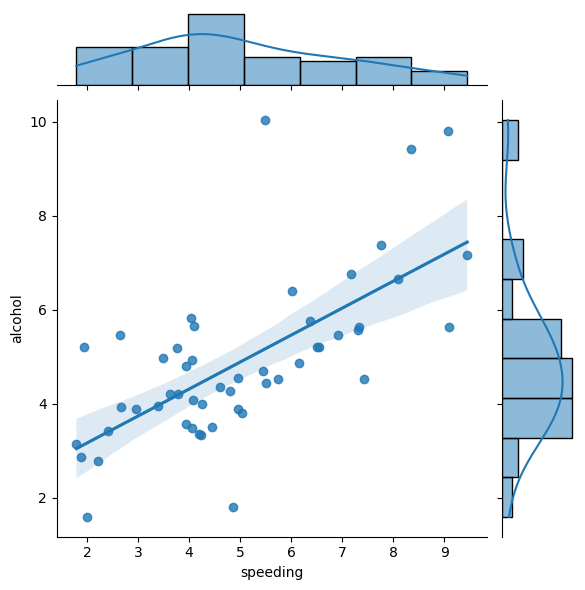

In [4]:
# Jointplot mit Regressionslinie zur Visualisierung des Zusammenhangs zwischen 'speeding' und 'alcohol'.
# - Streudiagramm zeigt individuelle Wertepaare.
# - Regressionslinie zeigt den linearen Trend (positiver Zusammenhang).
# - Schattierter Bereich ist das Konfidenzintervall der Regression.
# - Histogramme an den Rändern zeigen die Verteilung beider Variablen.
# - Hilft, Korrelation, Ausreißer und Verteilungsmuster schnell zu erfassen.

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
crash_df[['speeding', 'alcohol']].corr()

### KDE Plots (Kernel Density Estimation)
Ein KDE-Plot (Kernel Density Estimation) ist eine glatte Schätzung der Wahrscheinlichkeitsdichte einer kontinuierlichen Variablen. Er wird verwendet, um die Verteilung von Datenpunkten zu visualisieren, ohne sie in feste Bins wie bei einem Histogramm zu unterteilen.

<Axes: xlabel='alcohol', ylabel='Density'>

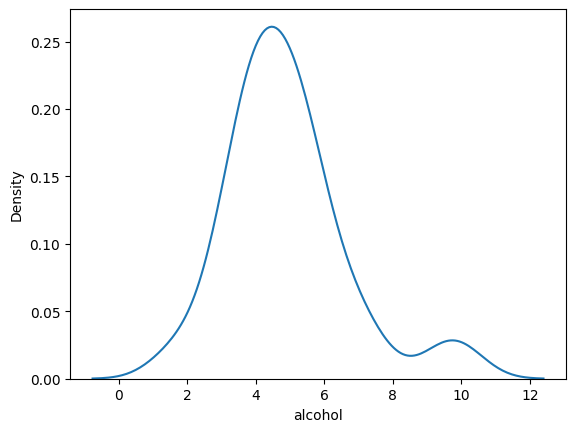

In [5]:
sns.kdeplot(crash_df['alcohol'])

### Pair Plots
Die Verhältnise der numerischen Werte eines Dataframes zueinander.

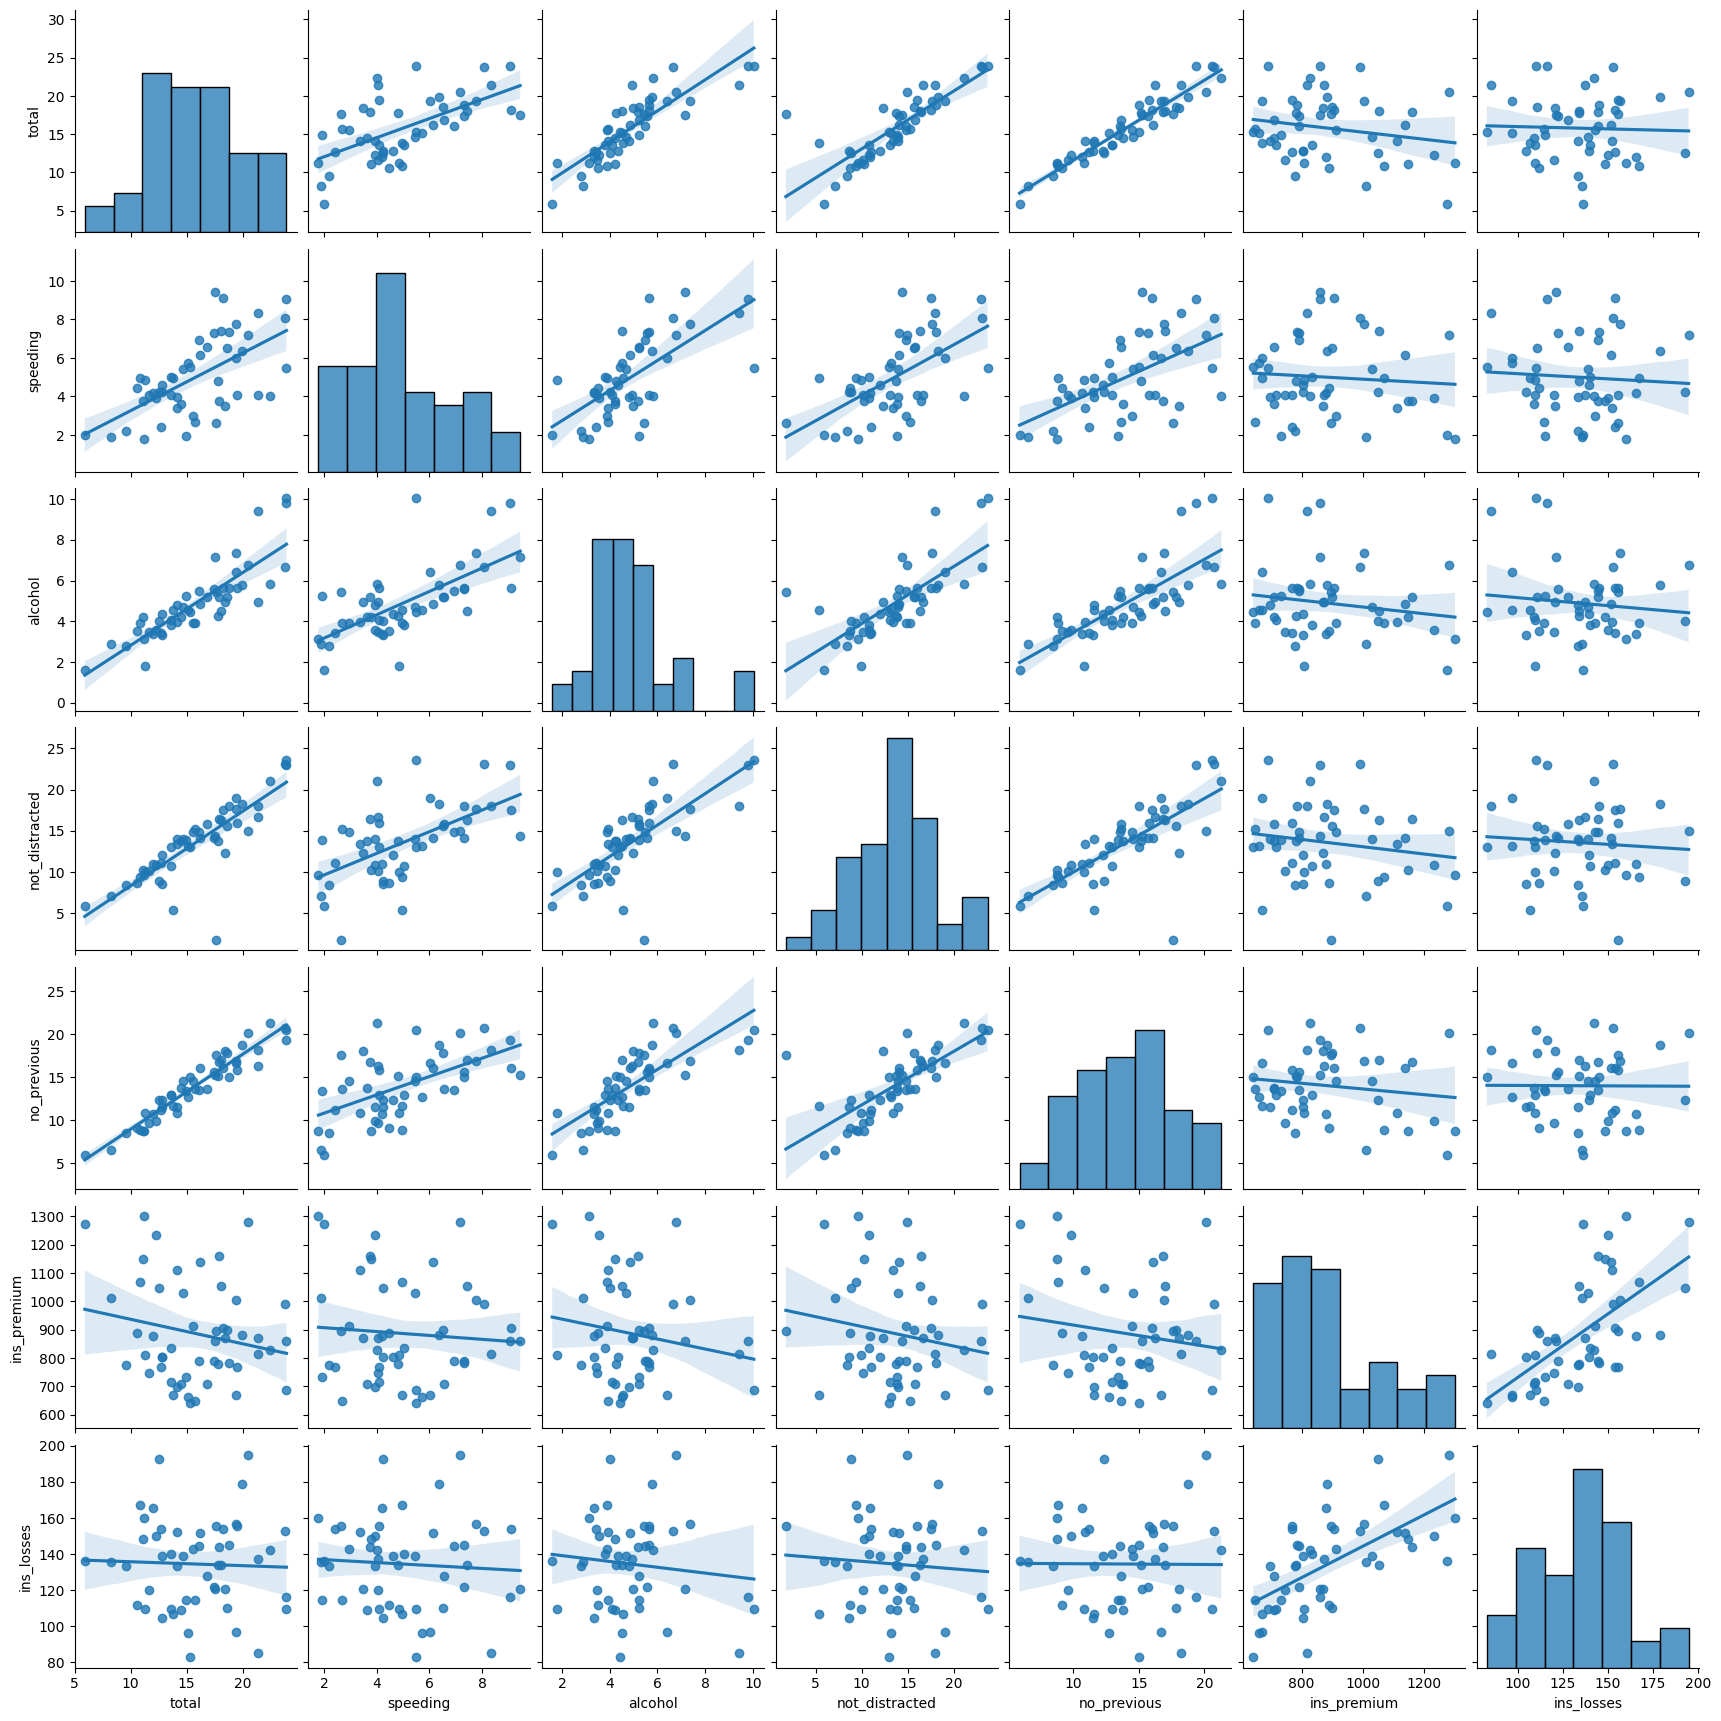

In [6]:
sns.pairplot(crash_df, kind='reg')



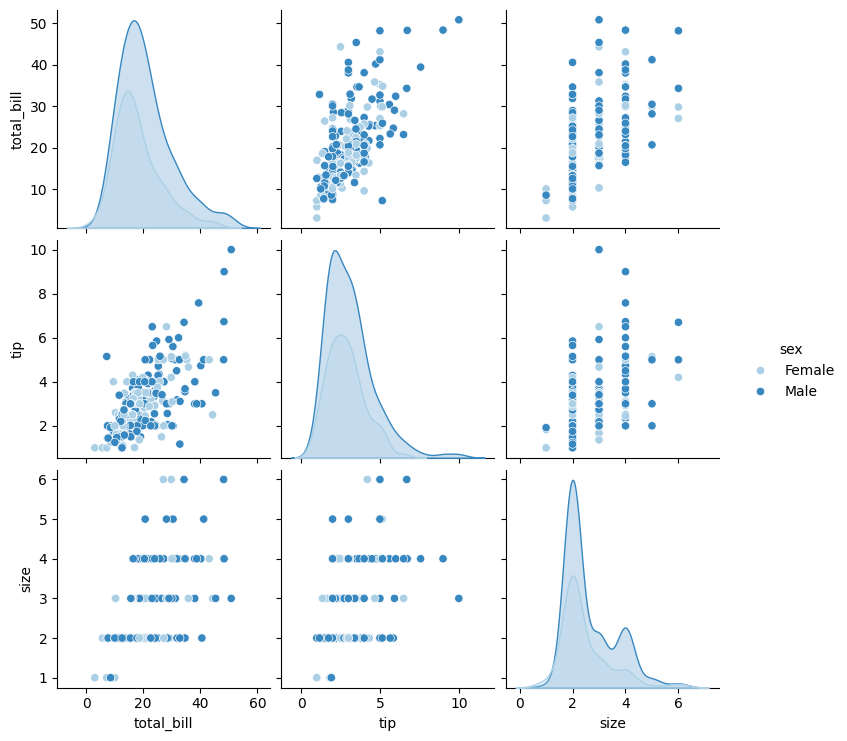

In [7]:
# Beispiel mit Dataframe Tips
tips_df = sns.load_dataset('Tips')
sns.pairplot(tips_df, hue='sex', palette='Blues')

### Rug Plot
Eine einzelne Spalte eines Dataframes wird als "Stick" dargestellt. Die *Dichte* dieser Sticks zeigt an welcher Betrag am meisten vorkommt - im Kontrast zum Histogramm wo die Werte *grösser* werden. Rug Plots werden nicht so oft genutzt wie andere Plots.

<Axes: xlabel='tip'>

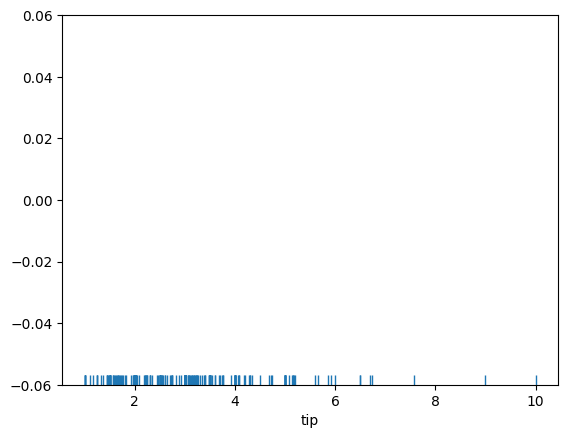

In [8]:
sns.rugplot(tips_df['tip'])

### Styling
Anpassung der Darstellung der Plots.

<Figure size 800x400 with 0 Axes>

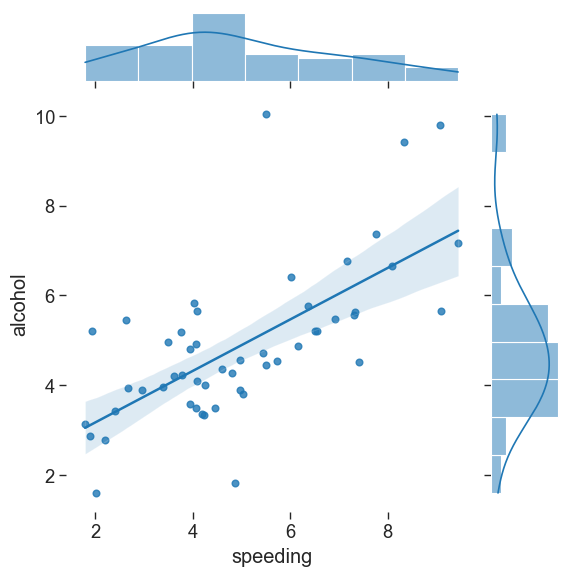

In [9]:
# Stylings für die Achsen und die Grids
# sns.set_style('darkgrid')
# sns.set_style('whitegrid')
# sns.set_style('dark')
# sns.set_style('white')
sns.set_style('ticks')

plt.figure(figsize=(8,4)) # Grösse des Plots ändern

# Grösse des Text ändern
sns.set_context('paper', font_scale=1.5) # 'paper' eignet sich für Dokumentationen
# sns.set_context('talk', font_scale=1.4) # 'talk' eignet sich für Präsentationen
# sns.set_context('poster', font_scale=1.4) # 'poster' eignet sich für Poster

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Seitenlinien entfernen
sns.despine(left=True, bottom=True)

## Categorical Plots
Verteilung von Kategorien in Referenz zu den numerischen Daten.

### Bar Plotes

<Axes: xlabel='sex', ylabel='total_bill'>

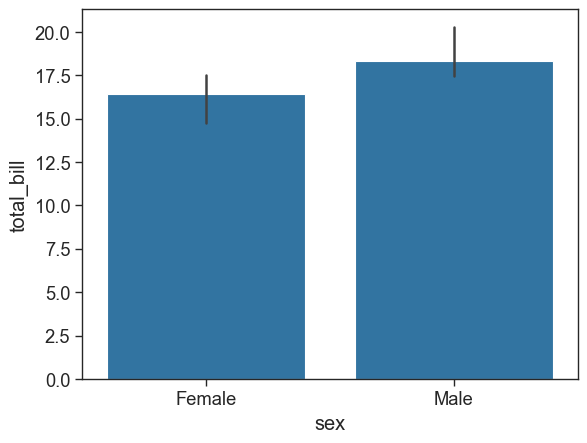

In [10]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot
Zählt die Anzahl der Records einer Kategorie.

<Axes: xlabel='sex', ylabel='count'>

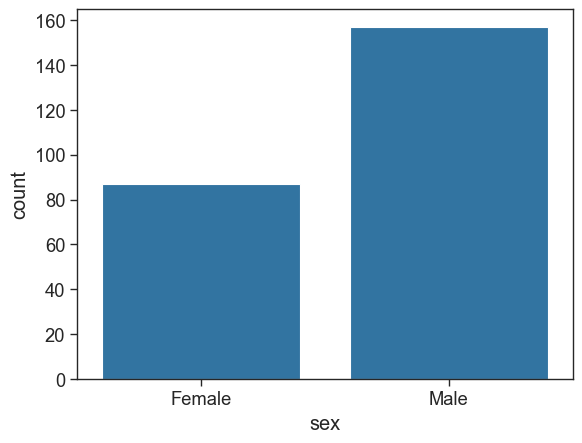

In [11]:
sns.countplot(x='sex', data=tips_df)

### Box Plot

<Axes: xlabel='day', ylabel='total_bill'>

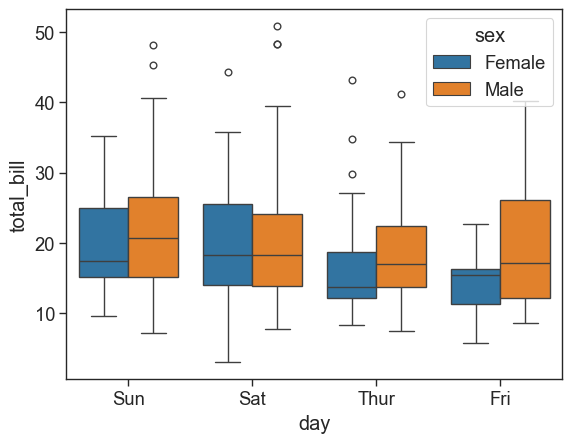

In [12]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')


### Violin Plot
Kombination eines Box Plot mit einem KDE Plot

<Axes: xlabel='day', ylabel='total_bill'>

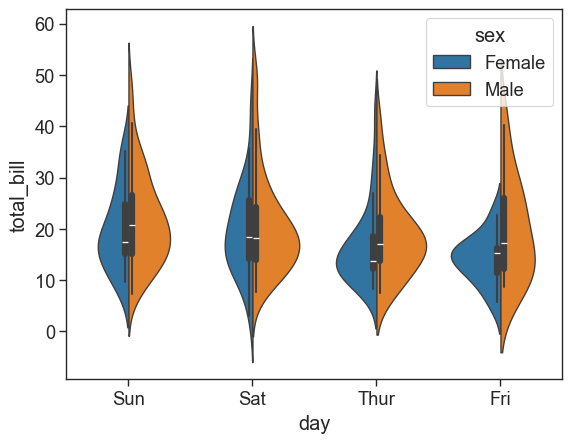

In [13]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip Plot

<Axes: xlabel='day', ylabel='total_bill'>

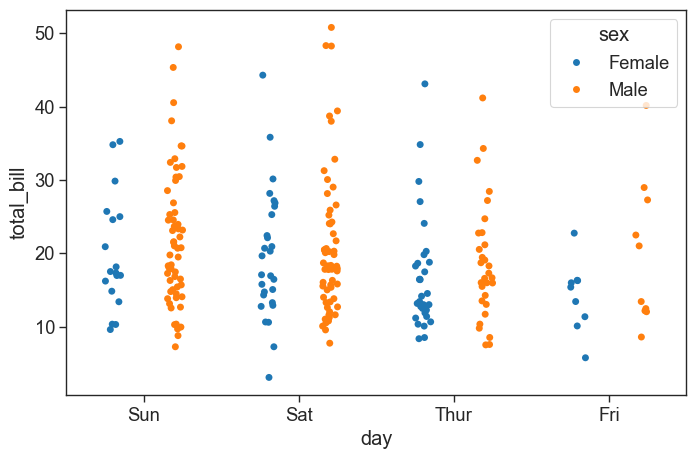

In [14]:
plt.figure(figsize=(8,5)) # Grösse des Plots ändern

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

### Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

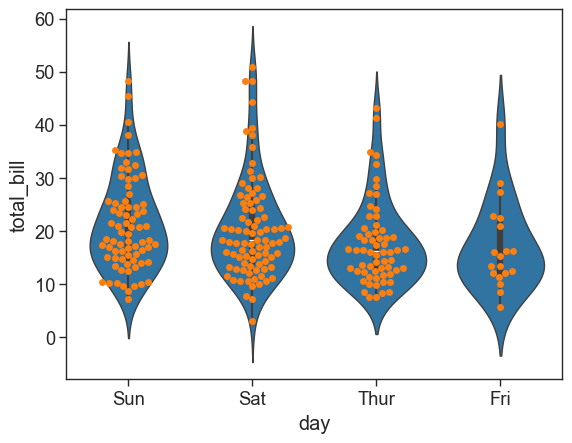

In [15]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df)

### Palettes

[Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

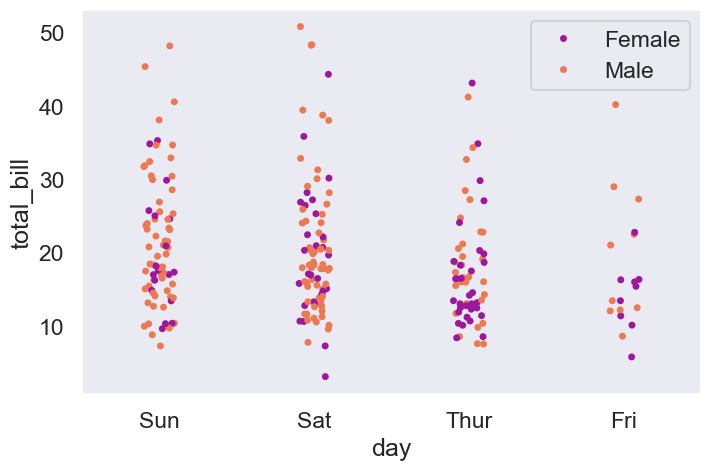

In [16]:
plt.figure(figsize=(8,5)) # Grösse des Plots ändern
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='plasma')
plt.legend(loc=0) # 0 = beste Position, 1 bis 10 = die verschiedenen Ecken und Seiten

## Matrix Plot

### Heatmaps

<Axes: >

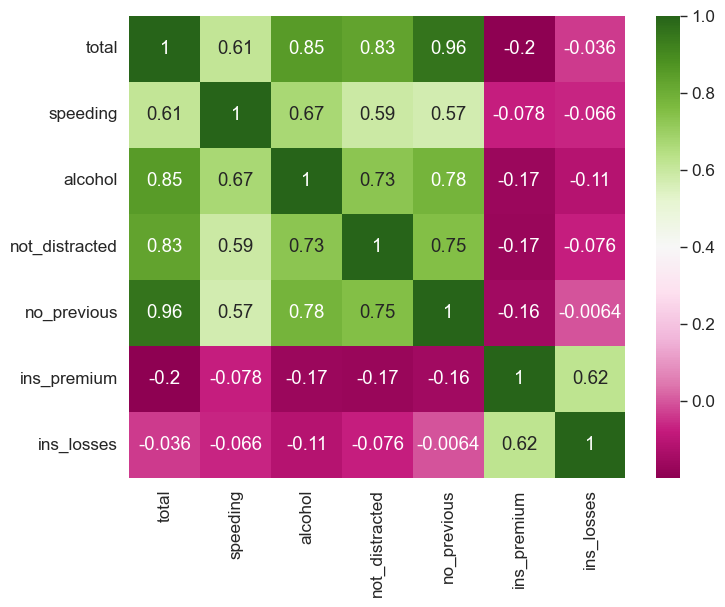

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# Wir müssen die Daten als Matrix bereitstellen.
# Das kann auf zwei Arten bewerkstelligt werden.
# 1) Funktion corr() auf Dataframe anwenden.

crash_mx = crash_df.select_dtypes(include=['number']).corr() # Nur numerische Werte für die Correlation/Matrix verwenden

sns.heatmap(crash_mx, annot=True, cmap='PiYG')


<Axes: xlabel='year', ylabel='month'>

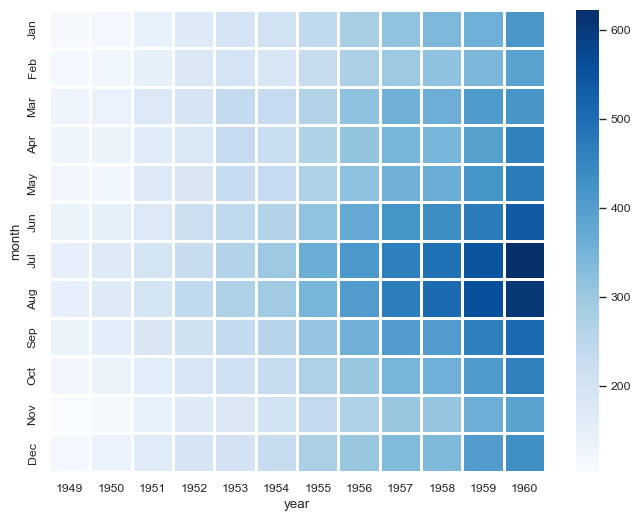

In [61]:
# 2) Pivot Table verwenden.
flights_df = sns.load_dataset('flights')
flights_mx = flights_df.pivot_table(index='month', columns='year', values='passengers', observed=True)

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1)
sns.heatmap(flights_mx, cmap='Blues', linewidths=1, linecolor='white')

### Cluster Maps

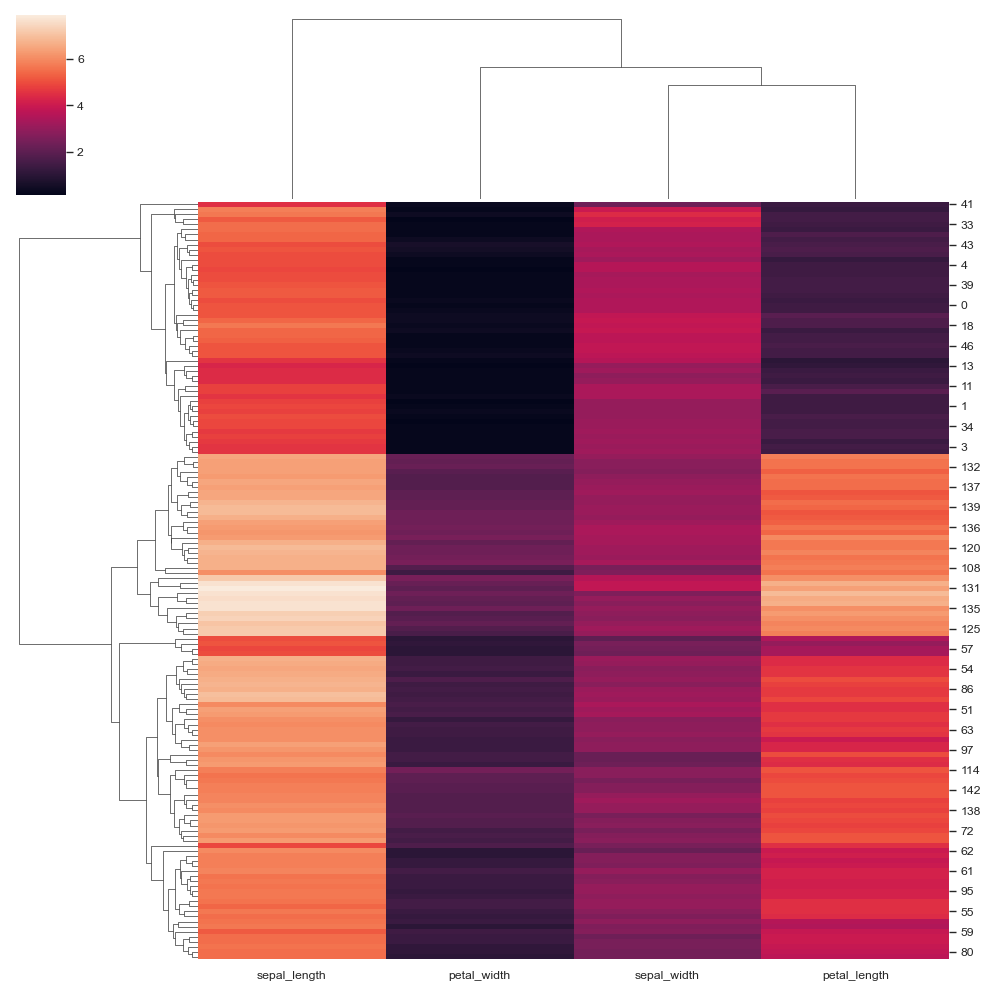

In [67]:
iris = sns.load_dataset('iris')
iris.head()

species = iris.pop('species')
sns.clustermap(iris)

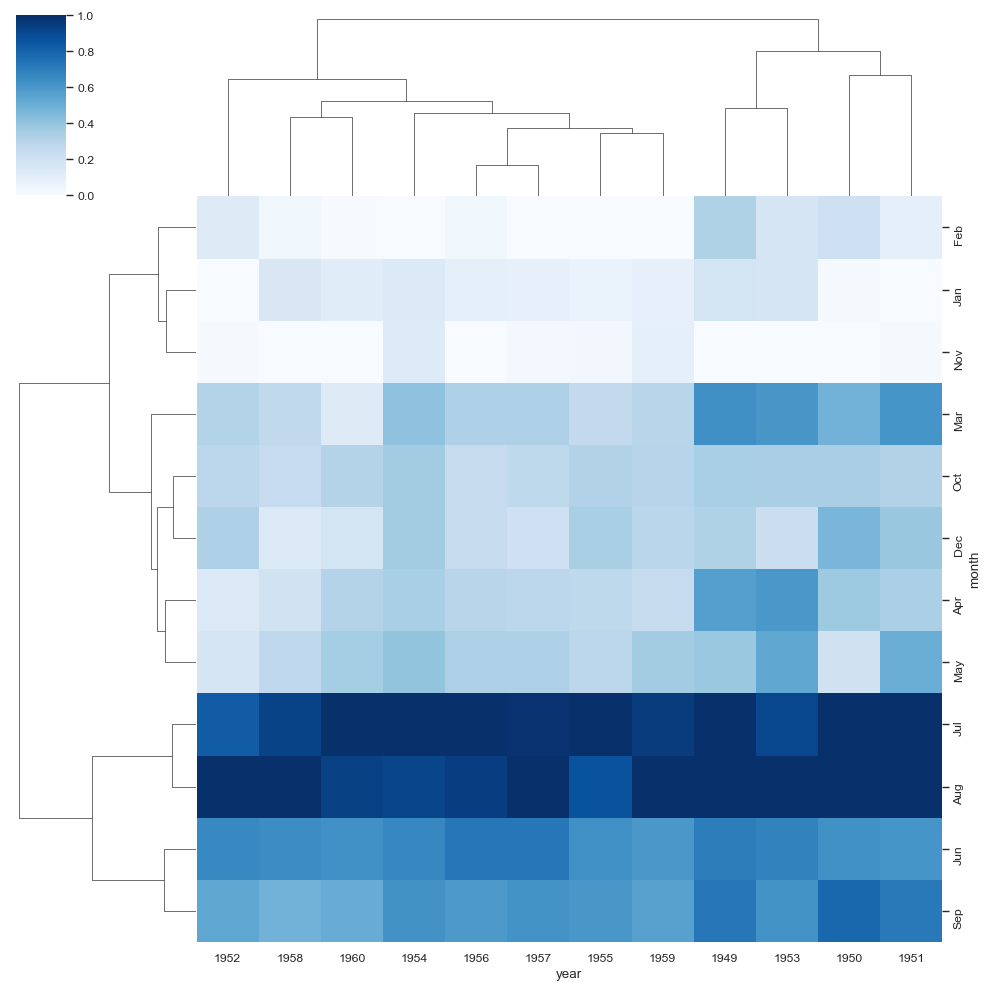

In [69]:
sns.clustermap(flights_mx, cmap='Blues', standard_scale=1)

### Pair Grids
Vergleichbar mit Pair Plots aber mehr auf spezifische Daten fokussiert.

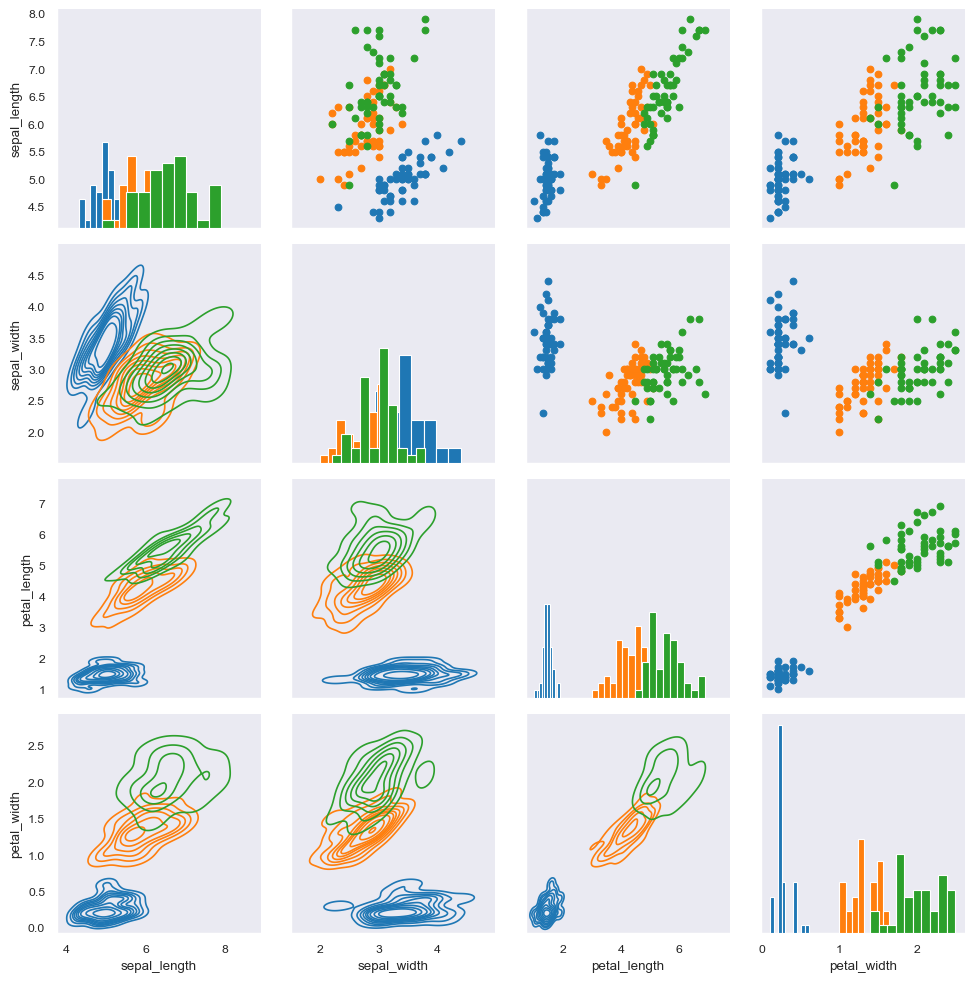

In [ ]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map(plt.scatter) # Alle Felder haben einen Scatter Plot
iris_g.map_diag(plt.hist) # Diagonale hat ein Histogram
# iris_g.map_offdiag(plt.scatter) # Alle Felder die nicht auf der Diagonalen liegen haben einen Scatter Plot
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)


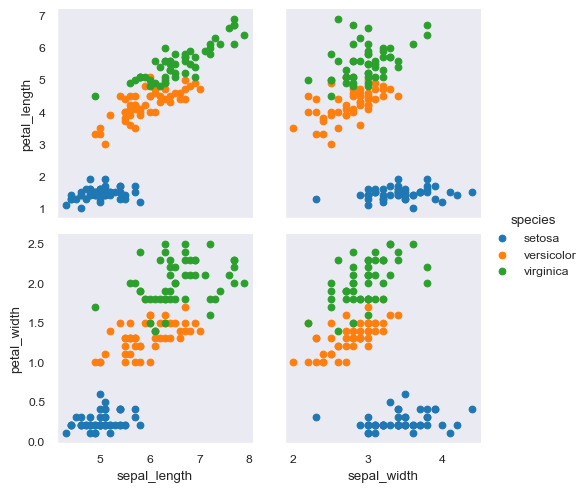

In [80]:
iris_g = sns.PairGrid(iris, hue='species', 
                      x_vars=['sepal_length', 'sepal_width'],
                      y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid
Ein FacetGrid wird verwendet, um mehrdimensionale Daten visuell zu segmentieren, indem mehrere Unterplots basierend auf kategorialen Variablen erstellt werden. Dies erleichtert den Vergleich zwischen verschiedenen Gruppen, ohne dass alle Daten in einem einzigen, unübersichtlichen Plot dargestellt werden müssen.

FacetGrid ist ideal für explorative Datenanalysen, wenn man Daten nach Gruppen aufteilen und Unterschiede visuell erkennen möchte.

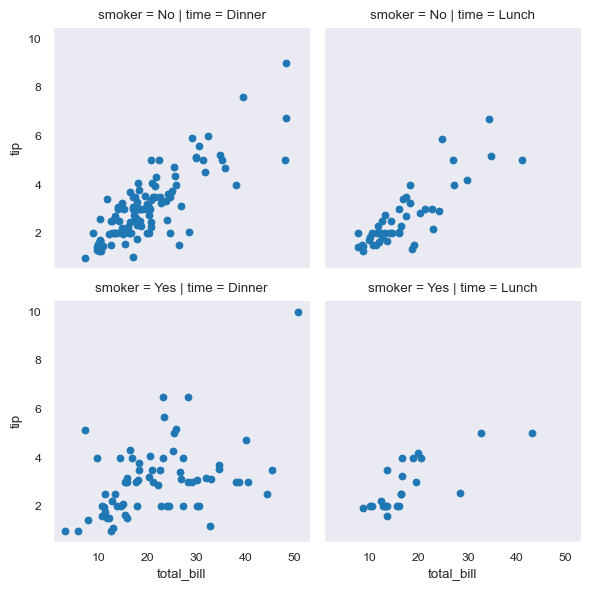

In [ ]:
tips_fg =sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.scatter, 'total_bill', 'tip')

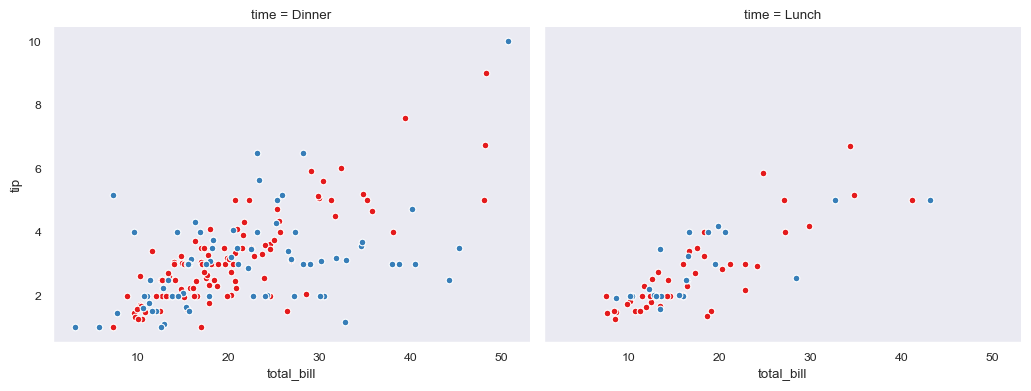

In [138]:
tips_fg =sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                       col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='white')

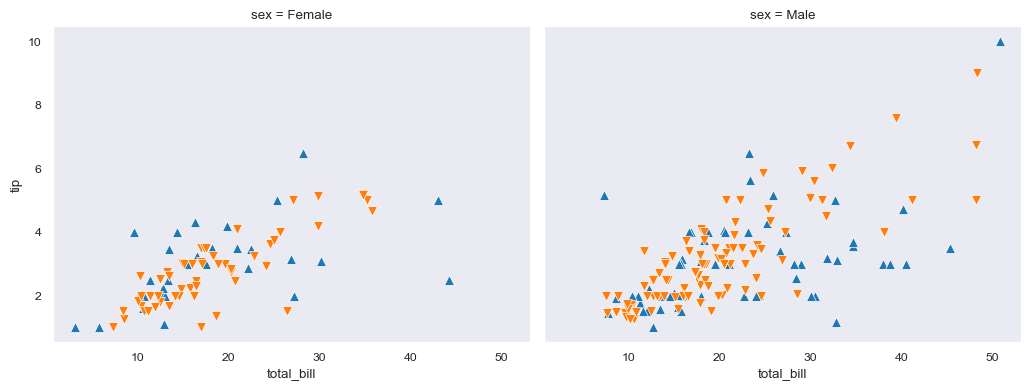

In [139]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=['Yes', 'No'],
                        hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

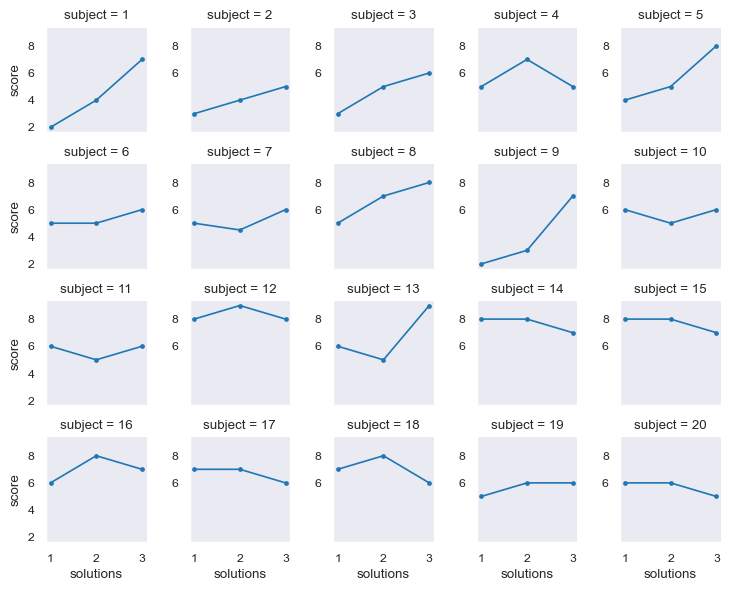

In [140]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression Plot

In [141]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

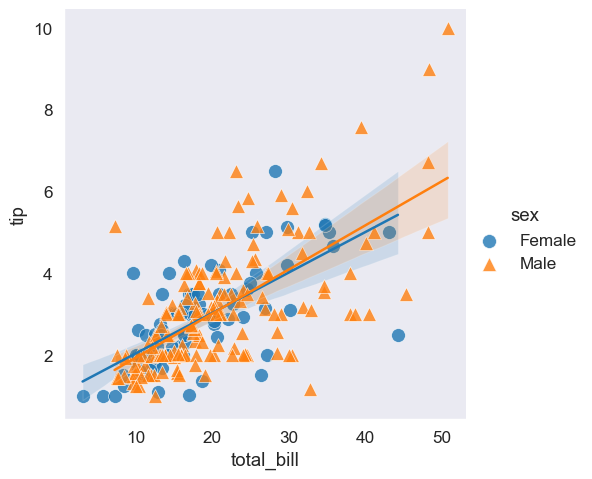

In [144]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'],
           scatter_kws={'s': 100, 'linewidths' : 0.5, 'edgecolor' : 'w'})

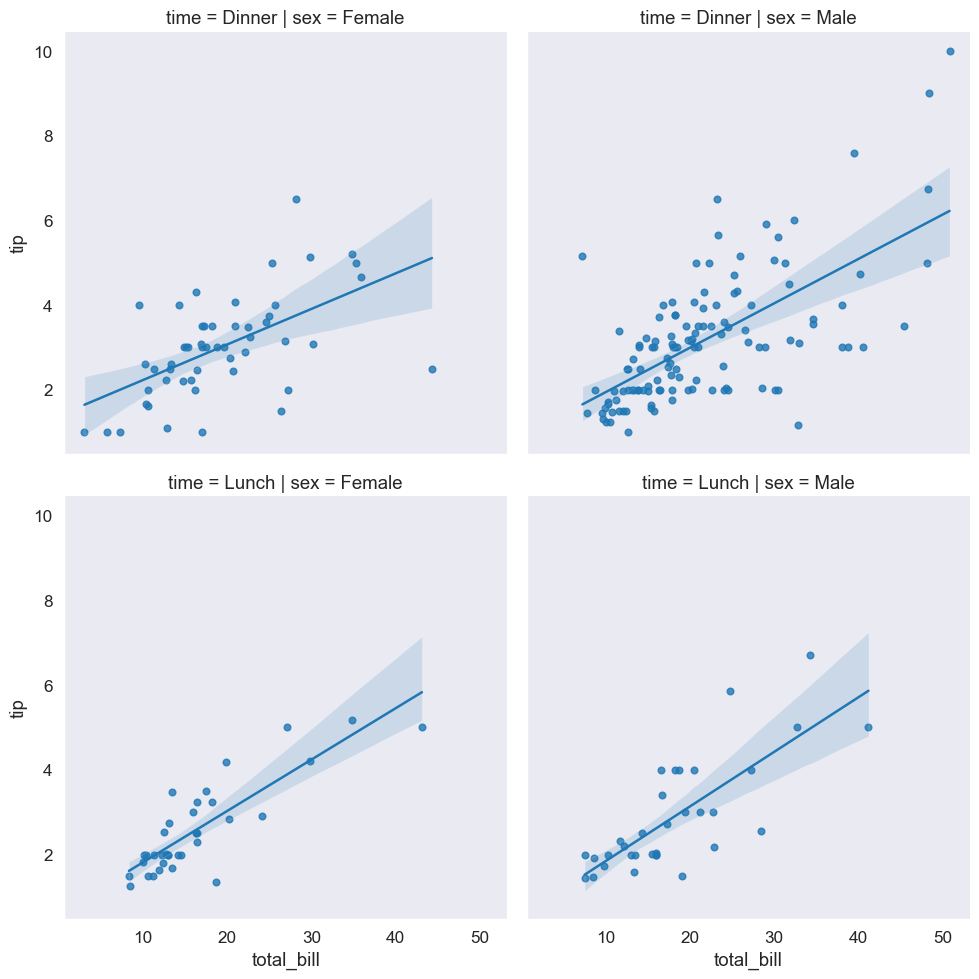

In [146]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)